Project Title:
AI-Driven Landslide Prediction

Problem Statement:
Landslides are one of the most devastating natural disaster causing significant loss of life, damage to infrastructure, and disruption to communities especially in mountainous and hilly regions. This project aims to develop a AI/ML-based system that analyze rainfall patterns to predict the likelihood of landslides in vulnerable regions.

Description:
This project focuses on building a landslide prediction system using Artificial Intelligence and Machine Learning.


In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LinearRegression
from sklearn.metrics import accuracy_score, classification_report, confusion_matrix
from sklearn.model_selection import cross_val_score
import joblib



In [2]:
df = pd.read_csv('catalog.csv')
df.head()

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,geolocation,hazard_type,landslide_type,landslide_size,trigger,storm_name,injuries,fatalities,source_name,source_link
0,34,3/2/07,Night,NaN,United States,US,Virginia,16000,Cherry Hill,3.40765,...,"(38.600900000000003, -77.268199999999993)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,NBC 4 news,http://www.nbc4.com/news/11186871/detail.html
1,42,3/22/07,NaN,NaN,United States,US,Ohio,17288,New Philadelphia,3.33522,...,"(40.517499999999998, -81.430499999999995)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,Canton Rep.com,http://www.cantonrep.com/index.php?ID=345054&C...
2,56,4/6/07,NaN,NaN,United States,US,Pennsylvania,15930,Wilkinsburg,2.91977,...,"(40.4377, -79.915999999999997)",Landslide,Landslide,Small,Rain,NaN,NaN,NaN,The Pittsburgh Channel.com,https://web.archive.org/web/20080423132842/htt...
3,59,4/14/07,NaN,NaN,Canada,CA,Quebec,42786,Châteauguay,2.98682,...,"(45.322600000000001, -73.777100000000004)",Landslide,Riverbank collapse,Small,Rain,NaN,NaN,NaN,Le Soleil,http://www.hebdos.net/lsc/edition162007/articl...
4,61,4/15/07,NaN,NaN,United States,US,Kentucky,6903,Pikeville,5.66542,...,"(37.432499999999997, -82.493099999999998)",Landslide,Landslide,Small,Downpour,NaN,NaN,0.0,Matthew Crawford (KGS),NaN


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1693 entries, 0 to 1692
Data columns (total 23 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    1693 non-null   int64  
 1   date                  1690 non-null   object 
 2   time                  629 non-null    object 
 3   continent_code        164 non-null    object 
 4   country_name          1693 non-null   object 
 5   country_code          1693 non-null   object 
 6   state/province        1692 non-null   object 
 7   population            1693 non-null   int64  
 8   city/town             1689 non-null   object 
 9   distance              1692 non-null   float64
 10  location_description  551 non-null    object 
 11  latitude              1692 non-null   float64
 12  longitude             1692 non-null   float64
 13  geolocation           1692 non-null   object 
 14  hazard_type           1693 non-null   object 
 15  landslide_type       

In [4]:
df.describe()

,id,population,distance,latitude,longitude,injuries,fatalities
count,1693.000000,1.693000e+03,1692.000000,1692.000000,1692.000000,515.000000,1446.000000
mean,4145.027761,9.345940e+04,7.822695,27.715661,-86.883660,0.526214,1.459198
std,2236.741960,5.226016e+05,9.358256,14.206341,14.332811,3.427514,9.184653
min,34.000000,0.000000e+00,0.000030,-10.125800,-117.309200,0.000000,0.000000
25%,2330.000000,2.080000e+03,1.936360,14.085650,-92.646625,0.000000,0.000000
50%,4087.000000,5.785000e+03,4.538635,35.613200,-83.653000,0.000000,0.000000
75%,6098.000000,1.886700e+04,9.873865,39.546400,-78.851325,0.000000,0.000000
max,7541.000000,1.229419e+07,74.460970,45.425700,-45.601000,45.000000,280.000000


In [5]:
df.isnull().sum()

id                         0
date                       3
time                    1064
continent_code          1529
country_name               0
country_code               0
state/province             1
population                 0
city/town                  4
distance                   1
location_description    1142
latitude                   1
longitude                  1
geolocation                1
hazard_type                0
landslide_type             1
landslide_size             1
trigger                    2
storm_name              1561
injuries                1178
fatalities               247
source_name              821
source_link              100
dtype: int64

In [6]:
df.shape

(1693, 23)

In [7]:
df.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

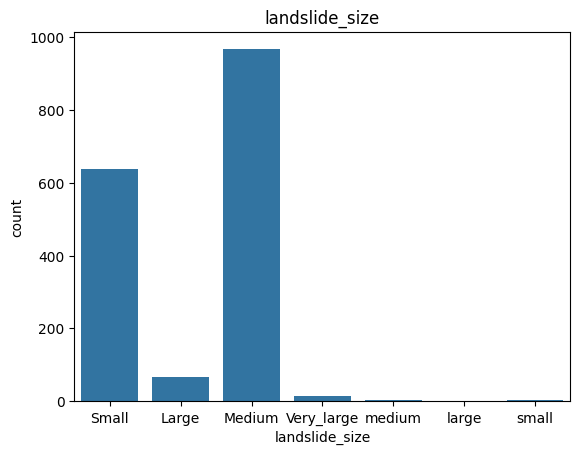

In [8]:
#Univariate Analysis
sns.countplot(x='landslide_size', data=df)
plt.title('landslide_size')
plt.show()

In [9]:
df.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

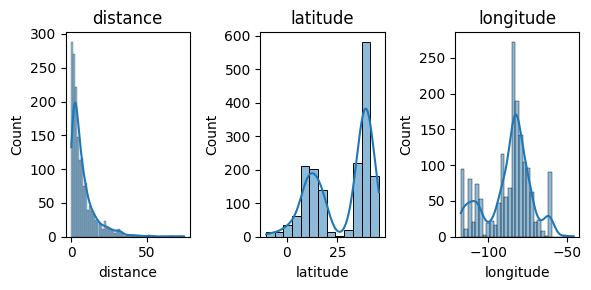

In [10]:
num_cols = ['distance', 'latitude', 'longitude']
fig, axes = plt.subplots(1, 3, figsize = (6, 3))
for ax, col in zip(axes, num_cols):
    sns.histplot(df[col], kde=True, ax=ax)
    ax.set_title(col)
plt.tight_layout()
plt.show()

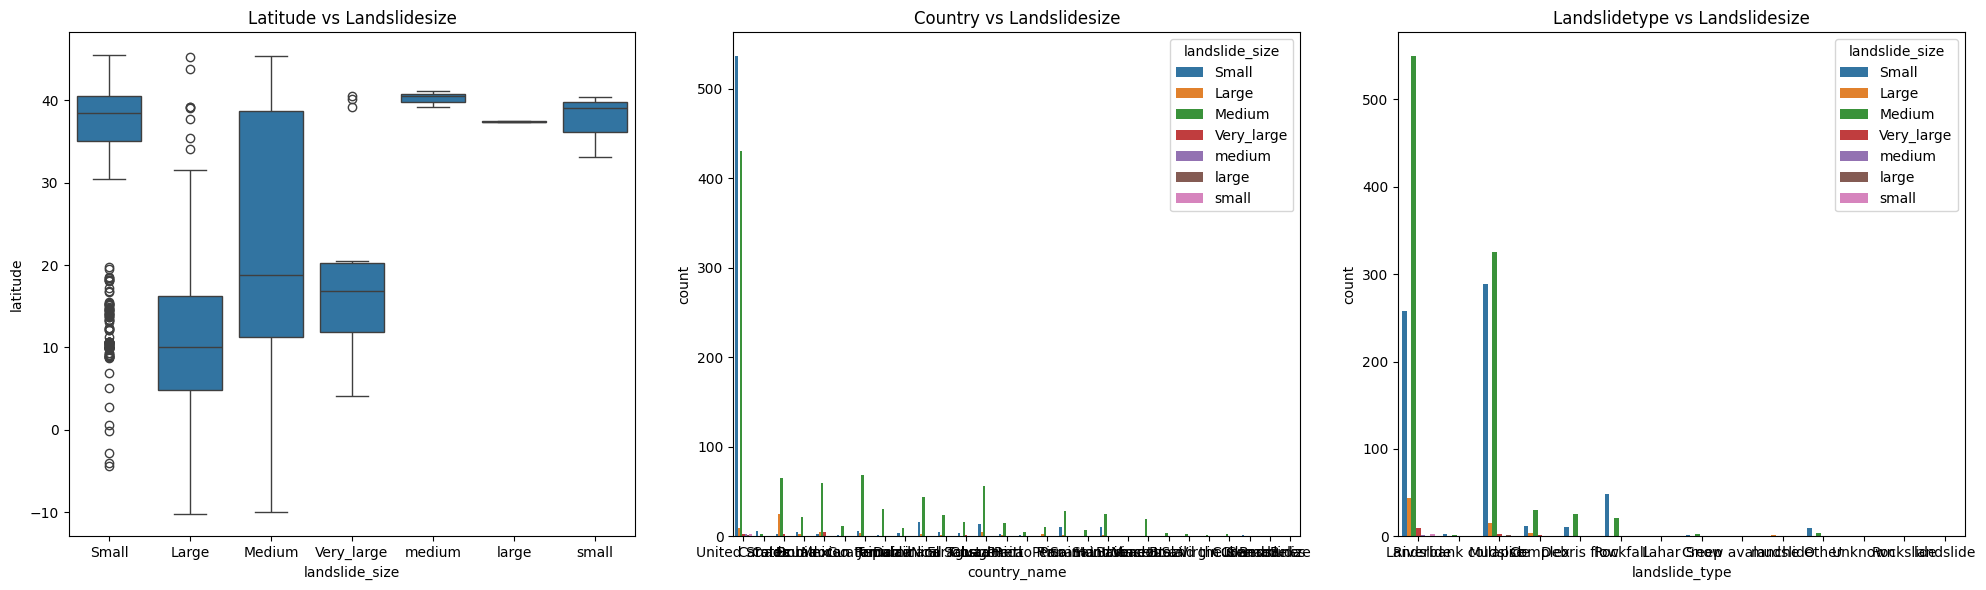

In [11]:
#Bivariate Analysis
fig, axes = plt.subplots(1, 3, figsize=(20,6))
sns.boxplot(x='landslide_size', y='latitude', data=df, ax=axes[0]).set_title('Latitude vs Landslidesize')
sns.countplot(x='country_name', hue='landslide_size', data=df, ax=axes[1]).set_title('Country vs Landslidesize')
sns.countplot(x='landslide_type', hue='landslide_size', data=df, ax=axes[2]).set_title('Landslidetype vs Landslidesize')
plt.tight_layout()
plt.show()

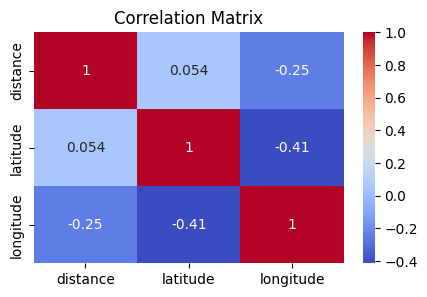

In [12]:
plt.figure(figsize=(5,3))
sns.heatmap(df[num_cols].corr(), annot=True, cmap='coolwarm')
plt.title('Correlation Matrix')
plt.show()

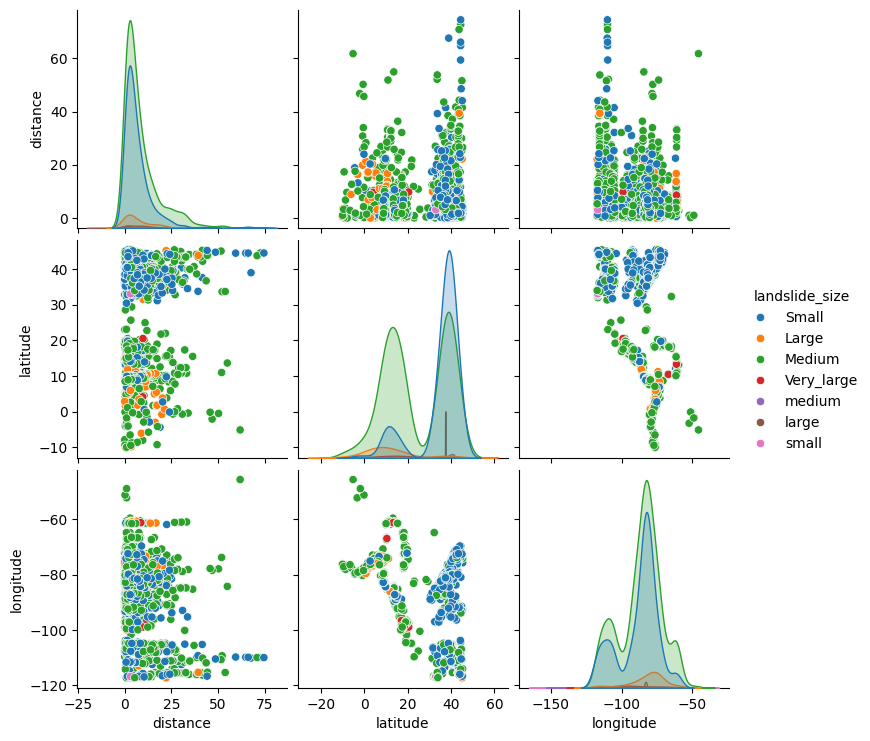

In [13]:
sns.pairplot(df, vars=num_cols, hue='landslide_size')
plt.show()

In [14]:
df.columns

Index(['id', 'date', 'time', 'continent_code', 'country_name', 'country_code',
       'state/province', 'population', 'city/town', 'distance',
       'location_description', 'latitude', 'longitude', 'geolocation',
       'hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link'],
      dtype='object')

In [15]:
#Data Preprocessing
le = LabelEncoder()
categorical_cols = ['time', 'continent_code', 'country_name', 'country_code', 'state/province', 'city/town', 'location_description','hazard_type', 'landslide_type', 'landslide_size', 'trigger',
       'storm_name', 'injuries', 'fatalities', 'source_name', 'source_link']
for col in categorical_cols:
    df[col] = le.fit_transform(df[col])

In [18]:
#Feature and Target Selection
X = df.drop('landslide_size', axis=1)
y = df['landslide_size']

In [19]:
#Split data into tranining and test sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [20]:
X_train.shape

(1354, 22)

In [21]:
X_test.shape

(339, 22)

In [22]:
#Scale numerical features
scaler = StandardScaler()
X_train[num_cols] = scaler.fit_transform(X_train[num_cols])
X_test[num_cols] = scaler.transform(X_test[num_cols])

In [23]:
X_train

,id,date,time,continent_code,country_name,country_code,state/province,population,city/town,distance,...,longitude,geolocation,hazard_type,landslide_type,trigger,storm_name,injuries,fatalities,source_name,source_link
1385,6698,9/19/14,159,1,6,6,173,34877,791,0.315825,...,0.243834,"(9.4359000000000002, -83.630300000000005)",0,4,9,49,0,0,39,1089
752,3574,6/6/11,154,0,5,5,19,8904,838,2.056315,...,0.899655,"(7.7895000000000003, -74.2239)",0,4,3,49,15,2,552,62
408,2265,8/18/10,73,1,26,24,202,1497,62,-0.649317,...,0.326613,"(36.136400000000002, -82.442999999999998)",0,0,3,49,15,0,552,1325
1653,7498,6/29/15,159,1,19,19,18,918,949,-0.124181,...,0.331668,"(9.2102000000000004, -82.370500000000007)",0,4,3,49,0,0,166,878
1216,5948,3/13/14,159,1,26,24,130,4368,757,-0.410977,...,0.181217,"(39.139600000000002, -84.528400000000005)",0,4,1,49,0,0,49,1207
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
1130,5510,9/12/13,159,1,26,24,44,2400,223,-0.106241,...,-1.267225,"(39.883899999999997, -105.30329999999999)",0,4,9,49,15,36,401,141
1294,6253,6/1/07,159,1,26,24,44,1864,369,-0.244756,...,-1.307098,"(40.0929, -105.87520000000001)",0,4,12,49,0,0,257,944
860,4138,1/11/12,159,1,26,24,139,305704,696,-0.638878,...,0.495714,"(40.437600000000003, -80.017600000000002)",0,4,9,49,15,0,552,499
1459,6940,6/19/15,159,1,26,24,44,6900,895,-0.112806,...,-1.236136,"(38.7714, -104.8574)",0,4,1,49,0,0,97,123
